# Task 1 Simple Perceptron training algorithm

This code is written with numpy as the matrix manipulation module, a tutorial for which can be found [here](https://docs.scipy.org/doc/numpy/user/quickstart.html)

You need the address the section of the code marked with **#TODO**



# New Section

In [0]:
import numpy as np # This is for mathematical operations

# this is used in plotting 
import matplotlib.pyplot as plt 
import time
import pylab as pl
from IPython import display

%matplotlib inline

In [0]:
class Perceptron:
    
    # input_size: dimension of the input including bias
    def __init__(self,input_size, num_class):

      
        # we store the input size because we will need it later
        self.input_size = input_size
        print(input_size)
        
        # weights (w) in randomly initalized to be the same size as the input
        self.w = np.random.randn(input_size,num_class).reshape(input_size,num_class)
        
        # we will store our accuracy after each iteration here
        self.history = []
        
    def train(self,X,Y, max_epochs = 100,h=0.05):
      
        # we clear history each time we start training
        self.history = []
        
        converged = False
        epochs = 0
        
        Y0 = (Y == 0)
        Y1 = (Y == 1)
        Y2 = (Y == 2)
        Y0 = np.float32(Y0)
        Y1 = np.float32(Y1)
        Y2 = np.float32(Y2)
        
        while not converged and epochs < max_epochs :
            
            # TODO
            # 1. add training code here that updates self.w 
            # 2.  a criteria to set converged to True under the correct circumstances.          

            out0 = np.matmul(X,self.w[0])
            Predict0 = (out0 >= 0)
            out1 = np.matmul(X,self.w[1])
            Predict1 = (out1 >= 0)
            out2 = np.matmul(X,self.w[2])
            Predict2 = (out2 >= 0)

            for i in range(len(Predict0)):
              if Y0[i]==1 and Predict0[i]==0:
                self.w[0]=(self.w[0]+h*X[i])

              elif Y0[i]==0 and Predict0[i]==1:
                self.w[0]=(self.w[0]-h*X[i])
            
            for i in range(len(Predict1)):
              if Y1[i]==1 and Predict1[i]==0:
                self.w[1]=(self.w[1]+h*X[i])

              elif Y1[i]==0 and Predict1[i]==1:
                self.w[1]=(self.w[1]-h*X[i])

            for i in range(len(Predict2)):
              if Y2[i]==1 and Predict2[i]==0:
                self.w[2]=(self.w[2]+h*X[i])

              elif Y2[i]==0 and Predict2[i]==1:
                self.w[2]=(self.w[2]-h*X[i])
            
            if len(self.history)!=0:
              if self.history[-1]>0.9999:
                converged = True          
            
            # after training one epoch, we compute again the accuracy
            self.compute_train_accuracy(X,Y)
            epochs +=1
        
        if epochs == max_epochs:
          print("Qutting: Reached max iterations")
          
        if converged:
          print("Qutting: Converged")
          
        self.plot_training_history()
    
    # The draw function plots all the points and our current estimate 
    # of the boundary between the two classes. Point are colored according to
    # the current output of the classifier. Ground truth boundary is also
    # plotted since we know how we generated the data
    
    def draw(self,X):
      
        pl.close()
        out0 = np.matmul(X,self.w[0])
        out1 = np.matmul(X,self.w[1])
        out2 = np.matmul(X,self.w[2])
        class0=X[out0 >= 0,:]
        class1=X[out1 >= 0,:]
        class2=X[out2 >= 0,:]

        x = np.linspace(-1,1)      
        pl.xlim((-1,1))
        pl.ylim((-1,1))
 
        pl.plot(class0[:,0],class0[:,1],'ro', label = 'class 0')
        pl.plot(class1[:,0],class1[:,1],'go', label = 'class 1')
        pl.plot(class2[:,0],class2[:,1],'bo', label = 'class 2')
        #pl.plot(x, x, label = 'GT')
        
        a0 = self.w[0][0]
        b0 = self.w[0][1]
        c0 = self.w[0][2]

        a1 = self.w[1][0]
        b1 = self.w[1][1]
        c1 = self.w[1][2]
        
        a2 = self.w[2][0]
        b2 = self.w[2][1]
        c2 = self.w[2][2]

        pl.plot(x, -a0/b0 * x - c0/b0,'r', label = 'Class 0 boundary')
        pl.plot(x, -a1/b1 * x - c1/b1,'g', label = 'Class 1 boundary')
        pl.plot(x, -a2/b2 * x - c2/b2,'b', label = 'Class 2 boundary')
        
        pl.axis('tight')
        pl.legend()
        
        display.clear_output(wait=True)
        display.display(pl.gcf())
        #time.sleep(1)
        
    
    # This computes the accuracy of our current estimate
    def compute_train_accuracy(self,X,Y):
        out0 = np.matmul(X,self.w[0])
        out1 = np.matmul(X,self.w[1])
        out2 = np.matmul(X,self.w[2])
        Y0_bar = (out0 >= 0)
        Y0_bar = Y0_bar.reshape(len(Y),1)
        Y1_bar = (out1 >= 0)
        Y1_bar = Y1_bar.reshape(len(Y),1)
        Y2_bar = (out2 >= 0)
        Y2_bar = Y2_bar.reshape(len(Y),1)
        Y0 = (Y == 0)
        Y0P=np.logical_and(Y0_bar,Y0)
        Y1 = (Y == 1)
        Y1P=np.logical_and(Y1_bar,Y1)
        Y2 = (Y == 2)
        Y2P=np.logical_and(Y2_bar,Y2)
        accuracy = (np.sum(Y0P)+np.sum(Y1P)+np.sum(Y2P))/X.shape[0]
        self.history.append(accuracy)
        print("Accuracy : %f " % (accuracy))
        self.draw(X)
        
    # Once training is done, we can plot the accuracy over time 
    def plot_training_history(self):
      fig0=plt.figure()
      plt.ylim((0,1.01))
      plt.plot(np.arange(len(self.history))+1, np.array(self.history),'-x')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy')
      plt.show()
      

In [8]:
# use this code snippet to upload the mat file to google colab 
# The dataset will be stored in the variables X and Y


import scipy.io as sio
import numpy as np

import os.path
if not os.path.isfile('training_data.mat'):
  from google.colab import files
  uploaded = files.upload()
  
  
  
data = sio.loadmat('training_data.mat')
X = np.array(data['X'])

X = np.append(X.T, np.ones((X.shape[1],1)),axis = 1)
Y = np.array(data['Y'])

print('Training data shape:',X.shape)
print('Labels shape:', Y.shape)

Training data shape: (15468, 3)
Labels shape: (15468, 1)


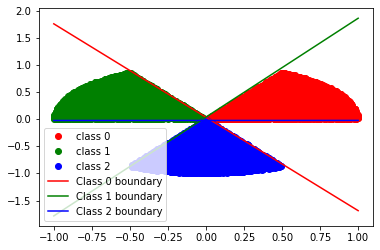

Qutting: Converged


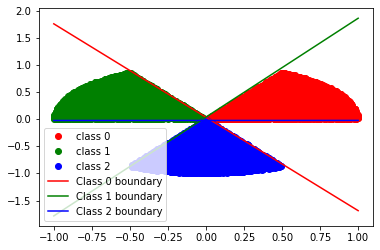

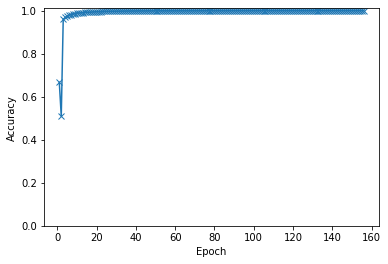

In [9]:
#number_of_samples = 100
max_number_of_epochs = 1000
h=0.0001
p = Perceptron(3,3)
p.train(X,Y,max_number_of_epochs)